# **Proyecto: Contaminación del Agua**


***Introducción al tema***

El agua es un recurso esencial para la vida y su calidad constituye un indicador crítico de la salud pública y del desarrollo sostenible. Este proyecto utiliza un dataset que recopila datos sobre los contaminantes presentes en el agua potable, medidos en distintos países y años, con el objetivo de identificar patrones de contaminación, evaluar riesgos y explorar la relación entre variables químicas y la seguridad del recurso hídrico. La base de datos incluye información sobre metales pesados (arsénico, plomo, mercurio, cadmio, uranio), compuestos químicos industriales (perclorato, cloramina), nutrientes que en exceso resultan nocivos (nitratos, nitritos, amoníaco), así como un indicador binario (is_safe) que señala si el agua puede ser considerada apta o no para consumo humano.

El análisis de estos datos es relevante dado que la contaminación del agua constituye uno de los principales desafíos ambientales y sanitarios a nivel global. La exposición prolongada a metales pesados y compuestos tóxicos se asocia con enfermedades crónicas, disfunciones neurológicas y problemas reproductivos. Por ello, resulta de interés no solo caracterizar los niveles promedio de contaminantes, sino también identificar cuáles de ellos tienen mayor peso en la determinación de la potabilidad. Además, se busca analizar cómo varían los contaminantes en el tiempo y entre países, lo que puede arrojar luz sobre desigualdades ambientales y prioridades de gestión en regiones específicas.

Desde una perspectiva metodológica, se emplearán técnicas de análisis exploratorio de datos (EDA) para obtener una primera aproximación a la distribución de los contaminantes y a las correlaciones entre ellos. Se construirán visualizaciones univariadas para observar la dispersión y tendencia de contaminantes clave, gráficos bivariados para explorar su relación con la variable is_safe y, finalmente, visualizaciones multivariadas que permitan identificar combinaciones de contaminantes asociadas a mayor riesgo sanitario. Los hallazgos no solo aportarán una descripción estadística de los datos, sino también un marco interpretativo que facilite la identificación de factores críticos en la contaminación del agua.

En conclusión, este proyecto busca responder si existen contaminantes específicos que determinan en mayor medida la seguridad del agua, qué países presentan niveles más elevados de riesgo, y si se observan tendencias temporales que reflejen mejoras o retrocesos en el control de la calidad del agua. Los resultados podrían contribuir a orientar políticas públicas y estrategias de intervención ambiental más eficaces.


***Entonces, el objetivo del presente análisis es el siguiente:***


¿Qué contaminantes presentan mayores niveles promedio en el agua a nivel global?

*Hipótesis: nutrientes como nitratos y amoníaco son los más elevados debido a la actividad agrícola.*

¿Existen contaminantes que influyen más directamente en que el agua sea clasificada como “no segura”?

*Hipótesis: metales pesados como plomo, arsénico y mercurio tienen mayor peso en la variable is_safe.*

¿Qué países presentan mayores niveles de contaminación en agua?

*Hipótesis: países con menor infraestructura de tratamiento muestran mayores concentraciones de contaminantes. *


# Exploratory Data Analysis (EDA)
Exploración del dataset mediante resúmenes estadísticos, identificación de valores perdidos y generación de visualizaciones que permitan responder las preguntas planteadas.


In [43]:
# Cargamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
# Carga del dataset
df = pd.read_excel("ContamAgua.xlsx")

In [45]:
# Visualizaión de la Información general del dataset
print(df.shape)
print(df.info())
df.head()

(3916, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3916 entries, 0 to 3915
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   sample       3916 non-null   int64         
 1   dt_year      3916 non-null   int64         
 2   dt_date      3916 non-null   datetime64[ns]
 3   country      3916 non-null   object        
 4   aluminium    3821 non-null   float64       
 5   ammonia      3916 non-null   float64       
 6   arsenic      3868 non-null   float64       
 7   barium       3910 non-null   float64       
 8   cadmium      3853 non-null   float64       
 9   chloramine   3887 non-null   float64       
 10  chromium     3912 non-null   float64       
 11  copper       3911 non-null   float64       
 12  flouride     3905 non-null   float64       
 13  bacteria     2395 non-null   float64       
 14  viruses      3414 non-null   float64       
 15  lead         3916 non-null   float64       


,sample,dt_year,dt_date,country,aluminium,ammonia,arsenic,barium,cadmium,chloramine,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1,2002,2002-01-01,Afghanistan,1.65,9.08,0.04,2.85,0.007,0.35,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1.0
1,2,2003,2003-01-01,Afghanistan,2.32,21.16,0.01,3.31,0.002,5.28,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1.0
2,3,2004,2004-01-01,Afghanistan,1.01,14.02,0.04,0.58,0.008,4.24,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,NaN
3,4,2005,2005-01-01,Afghanistan,1.36,11.33,0.04,2.96,0.001,7.23,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1.0
4,5,2006,2006-01-01,Afghanistan,0.92,24.33,0.03,0.20,0.006,2.67,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1.0


In [46]:
# verificación de datos faltantes o nulos
df.isnull().sum()

,0
sample,0
dt_year,0
dt_date,0
country,0
aluminium,95
ammonia,0
arsenic,48
barium,6
cadmium,63
chloramine,29


In [47]:
# Obtenemos una tabla con los datos booleanos donde TRUE indica dónse se encuentran los valores ausentes/nulos

is_nan=df.isnull()
is_nan

,sample,dt_year,dt_date,country,aluminium,ammonia,arsenic,barium,cadmium,chloramine,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3911,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3912,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3913,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
3914,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True


In [48]:
# reemplazo de valores faltantes por 0

df=df.replace(np.nan,0)

In [49]:
# Comprobamos que se aplique el reemplazo

df.isnull().sum()

,0
sample,0
dt_year,0
dt_date,0
country,0
aluminium,0
ammonia,0
arsenic,0
barium,0
cadmium,0
chloramine,0


# Preparación de la información para graficar

In [50]:
# Lista de contaminantes (todas las columnas numéricas menos fecha, año y sample)
# Dejamos las columnas necesarias para el análisis
contaminantes = df.drop(columns=["sample", "dt_year", "dt_date", "country", "is_safe"])
print(contaminantes)

      aluminium  ammonia  arsenic  barium  cadmium  chloramine  chromium  \
0          1.65     9.08     0.04    2.85    0.007        0.35      0.83   
1          2.32    21.16     0.01    3.31    0.002        5.28      0.68   
2          1.01    14.02     0.04    0.58    0.008        4.24      0.53   
3          1.36    11.33     0.04    2.96    0.001        7.23      0.03   
4          0.92    24.33     0.03    0.20    0.006        2.67      0.69   
...         ...      ...      ...     ...      ...         ...       ...   
3911       0.04     6.17     0.09    0.06    0.040        0.34      0.06   
3912       0.04     1.17     0.09    1.24    0.070        0.12      0.04   
3913       0.02    24.68     0.06    1.49    0.080        0.07      0.06   
3914       0.01     8.01     0.05    0.79    0.060        0.17      0.03   
3915       0.05    25.68     0.06    0.86    0.080        0.06      0.04   

      copper  flouride  bacteria  viruses   lead  nitrates  nitrites  mercury  \
0     

In [51]:
Lista_contaminantes = contaminantes.columns.tolist()

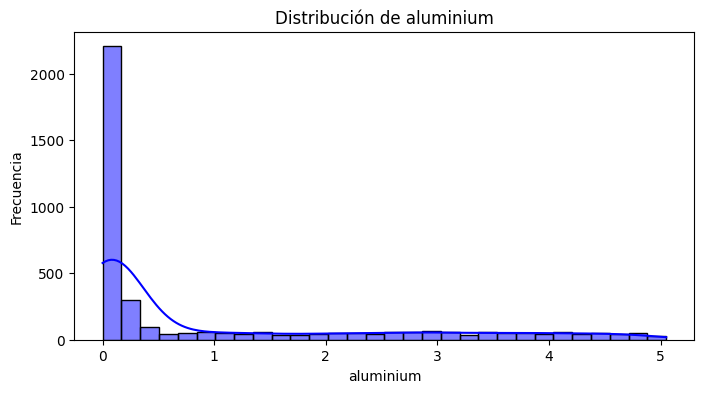

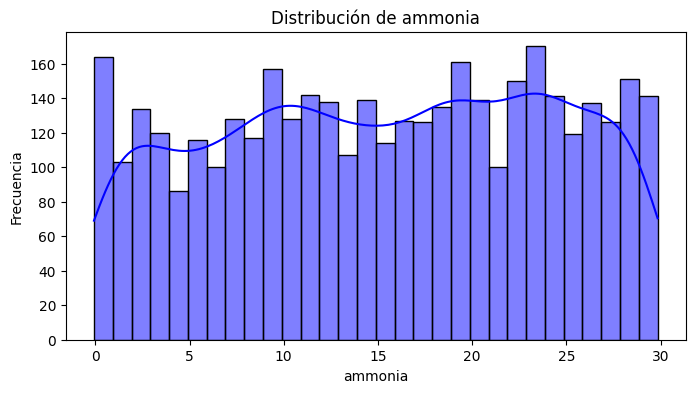

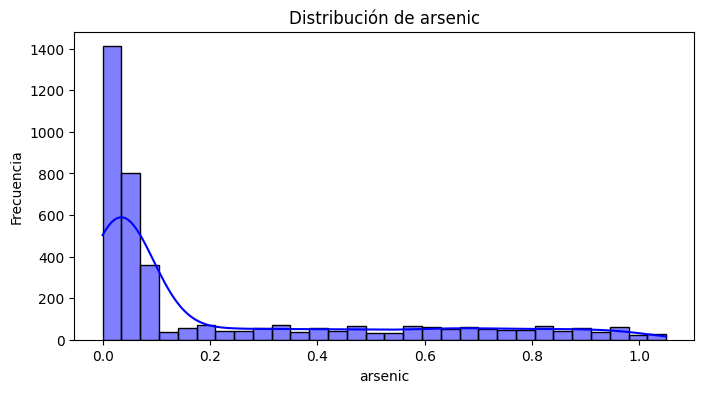

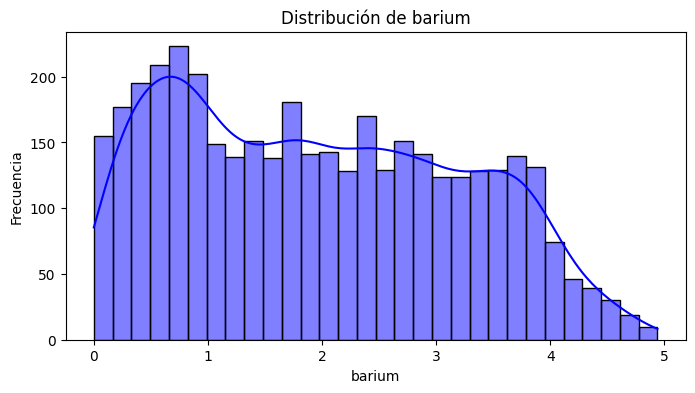

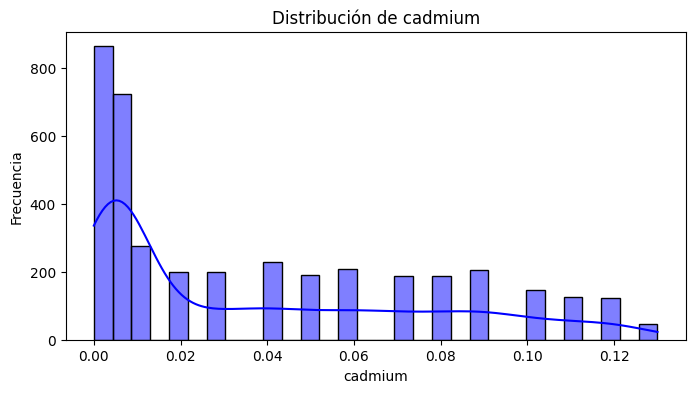

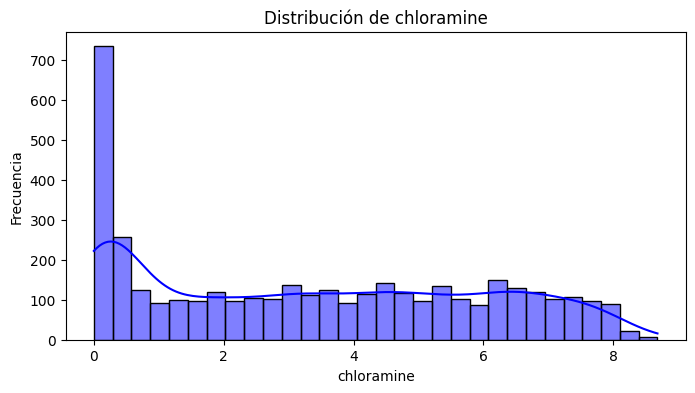

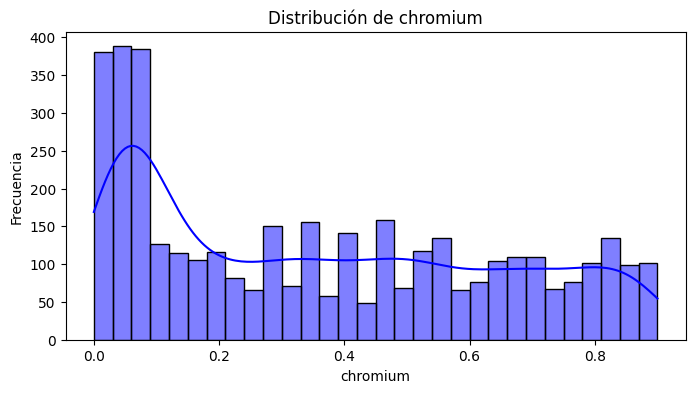

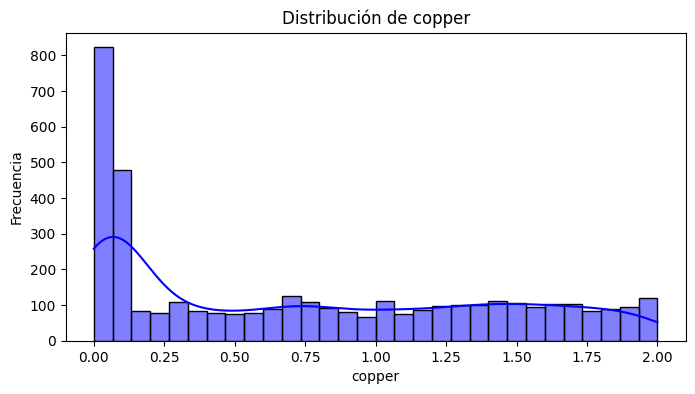

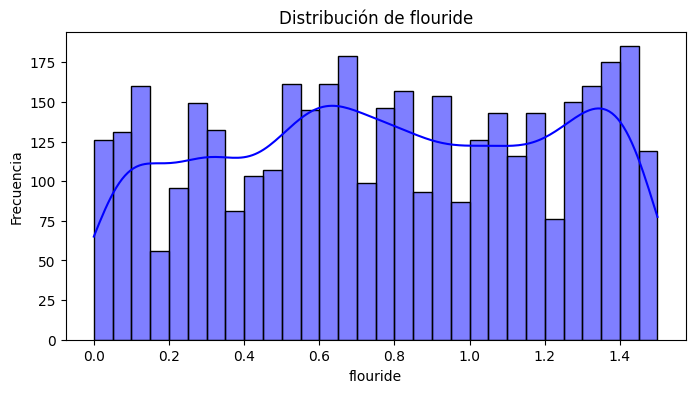

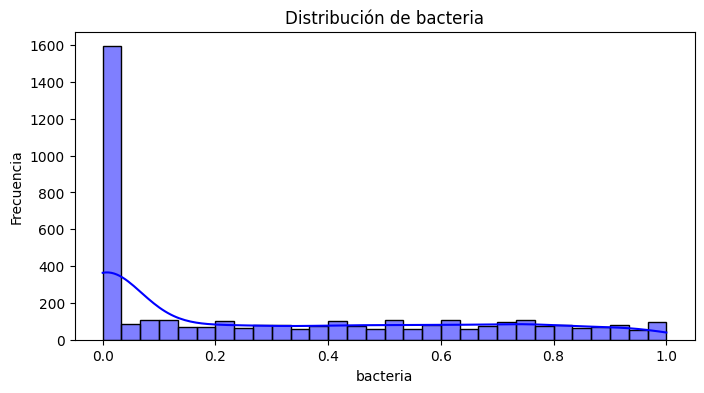

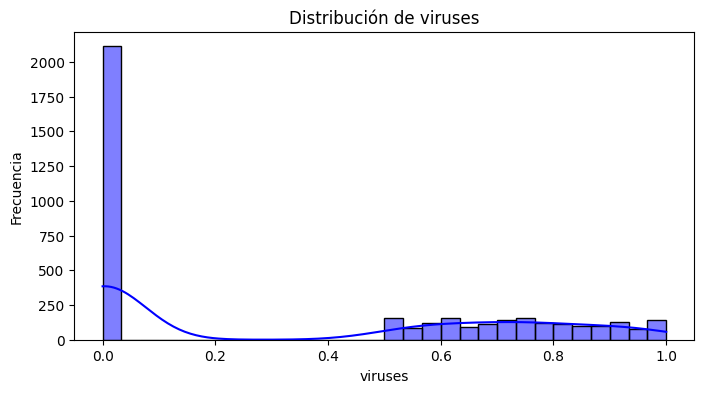

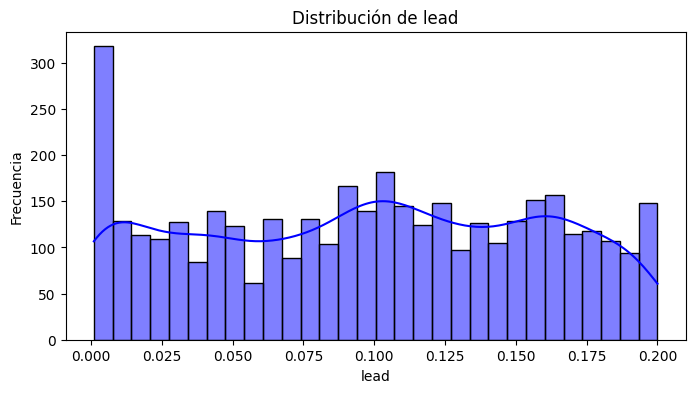

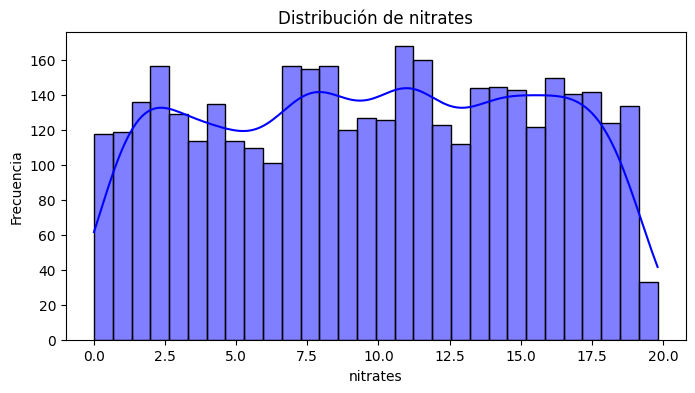

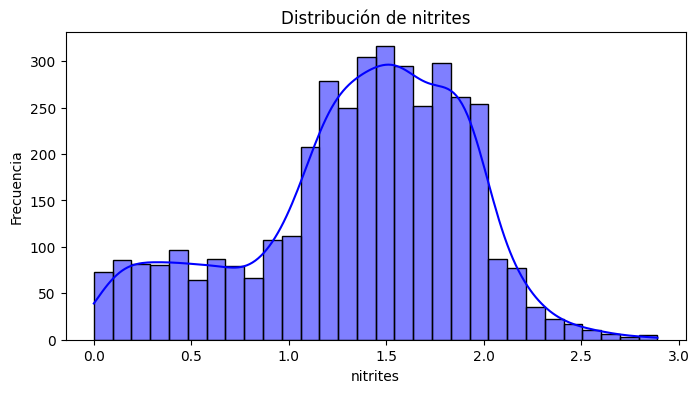

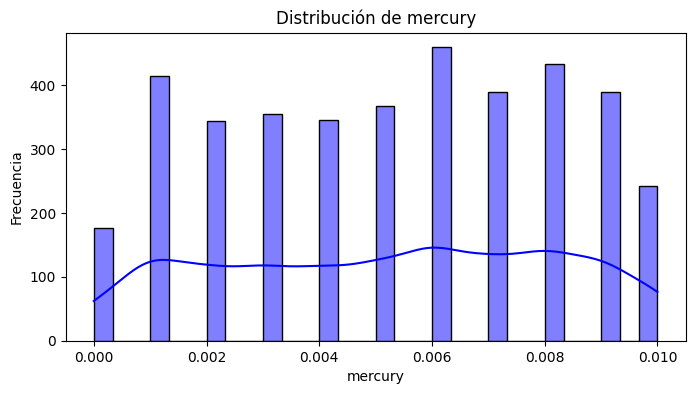

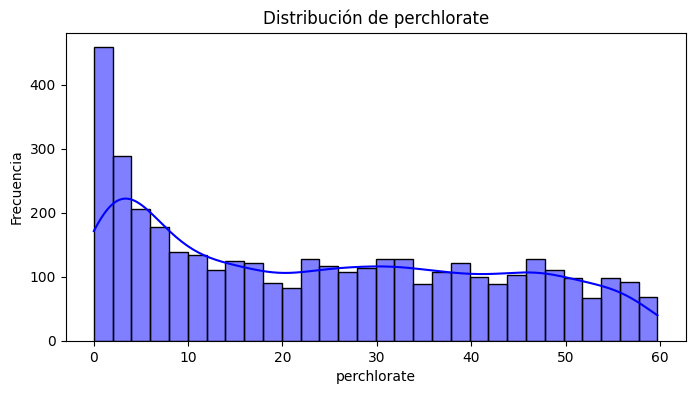

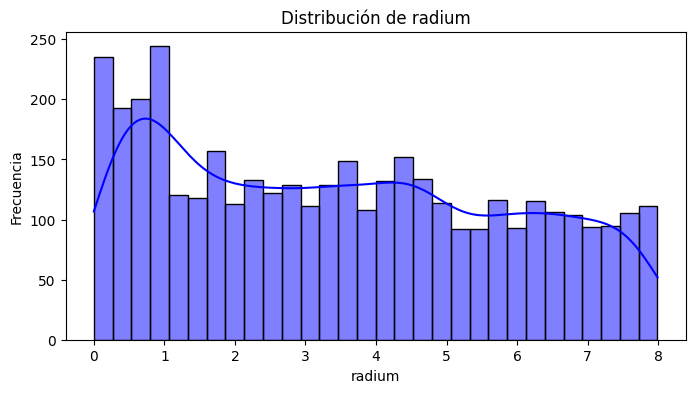

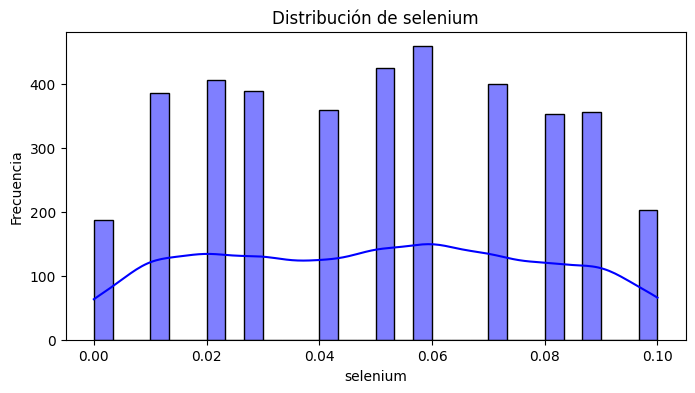

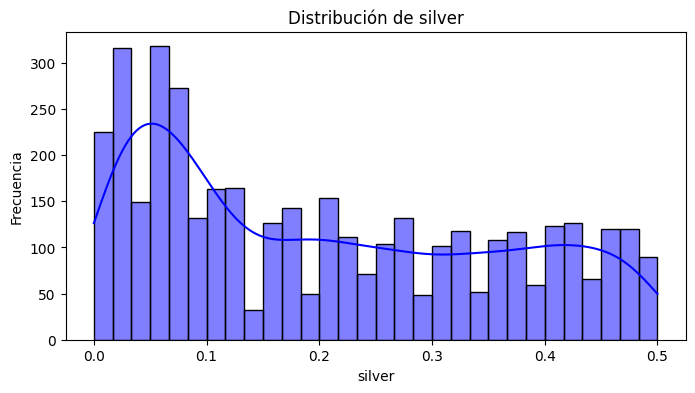

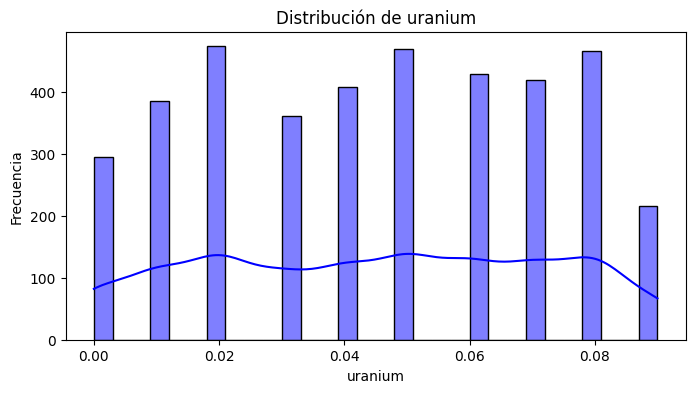

In [76]:
# Histogramas de distribución y frecuencia de los contraminantes
for col in contaminantes.columns:
    plt.figure(figsize=(8,4))
    sns.histplot(contaminantes[col], kde=True, bins=30, color="blue")
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()

En conclusión los histogramas muestran que cada tipo de contaminante tiene un patrón distinto de distribución:

Los metales pesados (plomo, arsénico, mercurio): pocos valores pero picos altos, indicando contaminación localizada y riesgo puntual.

Los Contaminantes biológicos (virus, bacterias): más frecuentes y variables, reflejando problemas de saneamiento general.

Nitratos: concentración más homogénea, asociada a contaminación agrícola.

Fluoruros: generalmente bajos, pero con casos de exceso que requieren control.

En general, los histogramas permiten identificar patrones y riesgos específicos de cada contaminante.

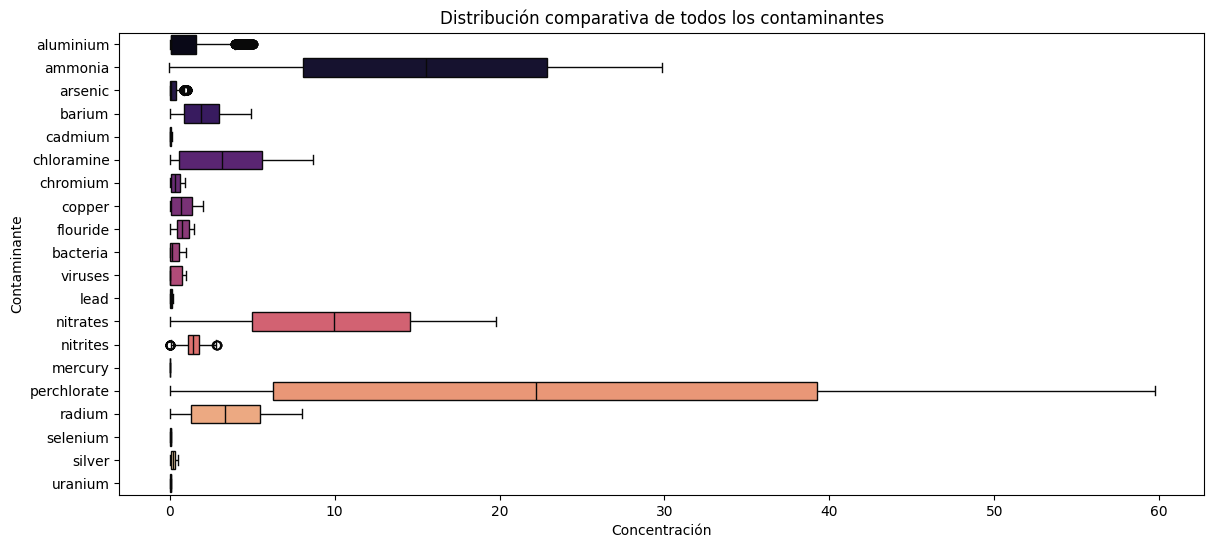

In [77]:
# Boxplot comparativo de todos los contaminantes

plt.figure(figsize=(14,6))
sns.boxplot(data=contaminantes, orient="h", palette="magma")
plt.title("Distribución comparativa de todos los contaminantes")
plt.xlabel("Concentración")
plt.ylabel("Contaminante")
plt.show()

La mayoría de los contaminantes tienen medianas bajas, pero los outliers muestran valores extremos que podrían representar focos de contaminación críticos. Los boxplots destacan la variabilidad y la presencia de valores extremos, útiles para priorizar acciones de monitoreo

In [87]:
# Boxplot comparativo de los contaminantes según si el agua es potable o no
# Transformación del fomato de los nombres de los contaminates
df["Agua_potable"] = df["is_safe"].apply(lambda x: "Sí" if x==1 else "No")
df_melt = df.melt(
    id_vars="Agua_potable",
    value_vars=contaminantes.columns,
    var_name="Contaminante",
    value_name="Concentración")

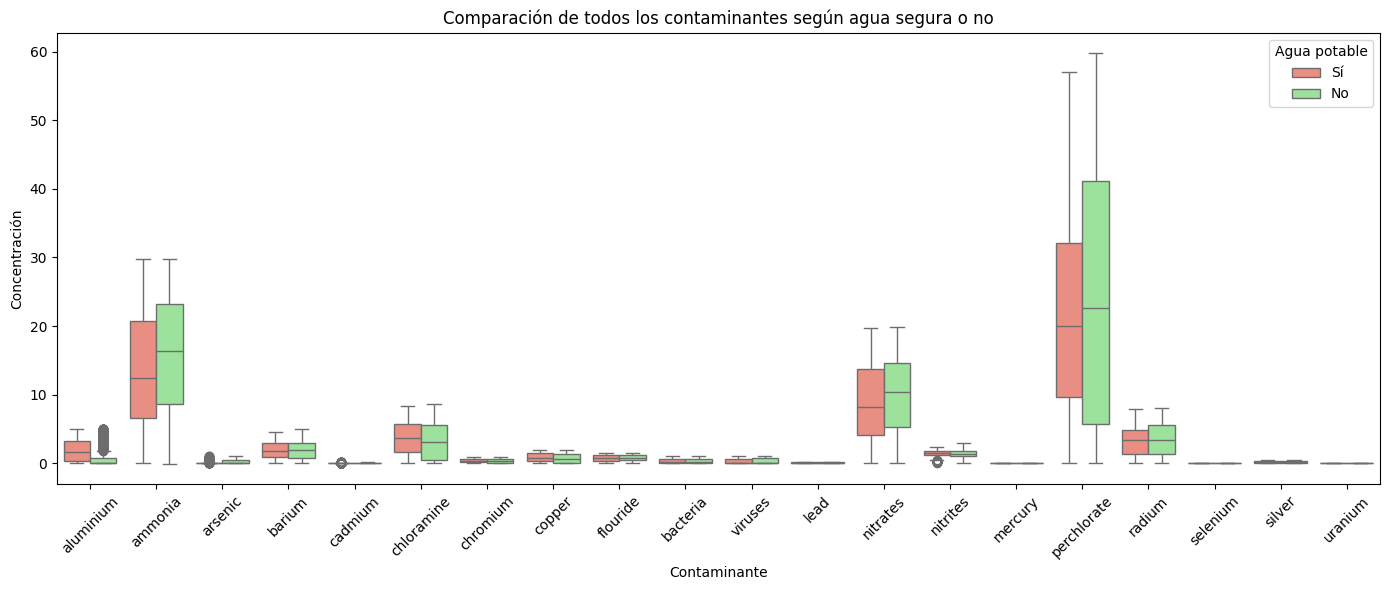

In [90]:
# Gráfico
plt.figure(figsize=(14,6))
sns.boxplot(
    x="Contaminante",
    y="Concentración",
    hue="Agua_potable",
    data=df_melt,
    palette={"Sí":"salmon", "No":"lightgreen"})
plt.title("Comparación de todos los contaminantes según agua segura o no")
plt.xlabel("Contaminante")
plt.ylabel("Concentración")
plt.xticks(rotation=45)  # Para que se lean bien los nombres largos
plt.legend(title="Agua potable")
plt.tight_layout()
plt.show()

El Boxplot comparativo muestra que los contaminantes como el plomo, arsénico y cadmio presentan concentraciones claramente más altas en agua no segura, mientras que el agua segura mantiene niveles bajos y consistentes. Esto indica que estos contaminantes son críticos para determinar la potabilidad del agua.

In [99]:
# Gráfico top 10 de paises más contaminados
contaminantes_mean = df.groupby("country")[Lista_contaminantes].mean()
# Promedio de todos los contaminantes por país
promedio_total = contaminantes_mean.mean(axis=1)

In [100]:
# Top 10 países con mayor promedio
top10_final = promedio_total.sort_values(ascending=False).head(10)

/tmp/ipython-input-3795334961.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_final.values, y=top10_final.index, palette="magma")


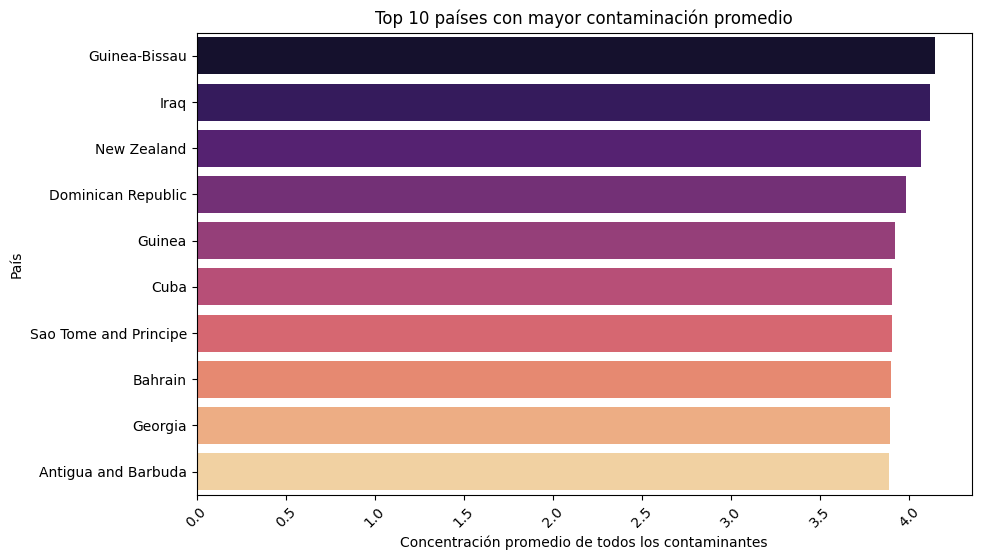

In [101]:
# Gráfico
plt.figure(figsize=(10,6))
sns.barplot(x=top10_final.values, y=top10_final.index, palette="magma")
plt.title("Top 10 países con mayor contaminación promedio")
plt.xlabel("Concentración promedio de todos los contaminantes")
plt.xticks(rotation=45)
plt.ylabel("País")
plt.show()

Qué contaminante predomina en cada país del Top  10

In [109]:
# Selección del país
top10_paises = promedio_total.sort_values(ascending=False).head(10).index

In [110]:
# Filtro de los datos de cada uno de esos países
top10_data = contaminantes_mean.loc[top10_paises]

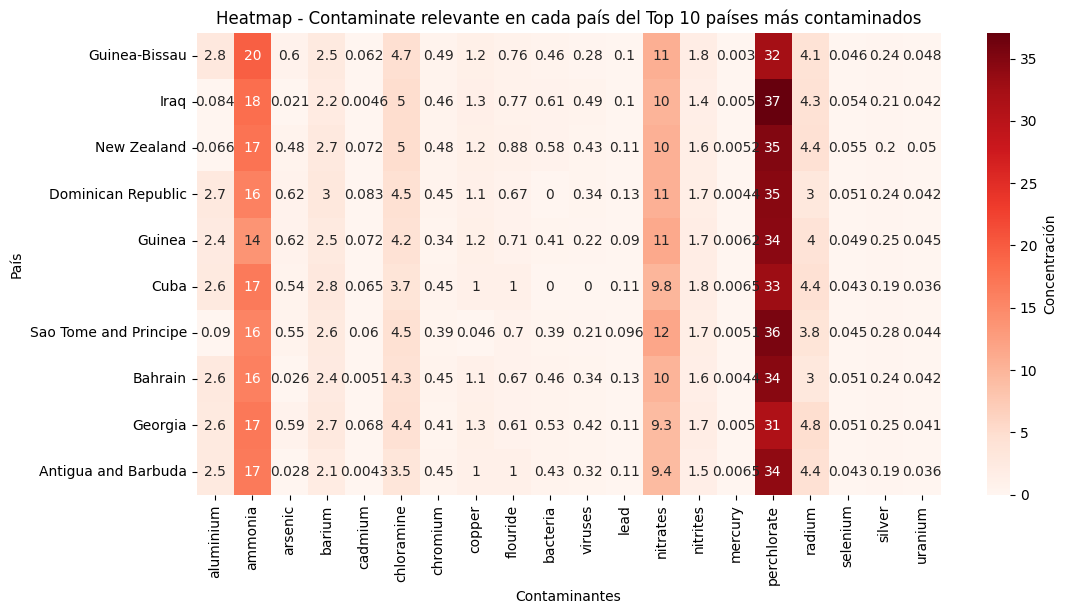

In [108]:
# Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(top10_data, annot=True, cmap="Reds", cbar_kws={'label': 'Concentración'})
plt.title("Heatmap - Contaminate relevante en cada país del Top 10 países más contaminados")
plt.xlabel("Contaminantes")
plt.ylabel("País")
plt.show()

El top 10 global muestra qué países presentan la peor calidad de agua considerando todos los contaminantes en conjunto.

El heatmap permite detectar qué contaminante pesa más en cada país:

Algunos países destacan por metales pesados, otros por contaminantes biológicosy otros por nutrientes químicos.

# **Modelado y predicción**

**Feature Selection**

Aplicamos SelectKBest con ANOVA F-test para reducir la dimensionalidad del dataset y seleccionar las 10 variables más relevantes para predecir la potabilidad (is_safe). Esta técnica permite centrarse en los contaminantes con mayor relación estadística con la potabilidad, descartando variables de bajo impacto.

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

In [57]:
# Definición de las variables predictoras (X) y target (y)
X = df.drop(columns=["sample", "dt_year", "dt_date", "country", "is_safe"])
y = df["is_safe"].fillna(0)  # reemplazo NaN por 0 (no seguro)

In [58]:
# Normalización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [59]:
# Selección las 10 variables más relevantes con ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X_scaled, y)

In [60]:
# Nombres de las features seleccionadas
mask = selector.get_support()
Features_seleccionadas = X.columns[mask]
print("Features seleccionadas:", list(Features_seleccionadas))

Features seleccionadas: ['aluminium', 'ammonia', 'arsenic', 'cadmium', 'chromium', 'copper', 'viruses', 'nitrates', 'nitrites', 'uranium']


**Modelo de Clasificación**

Dado que is_safe es una variable binaria, utilizamos un modelo de Random Forest Classifier.

Este algoritmo es adecuado porque maneja relaciones no lineales, es robusto frente a outliers y permite interpretar la importancia de las variables.

Los datos se dividieron en 70% entrenamiento y 30% test.

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
# Entrenamiento del modelo
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

In [63]:
# Modelo: Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# **Métricas de Evaluación del Modelo**

In [65]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [114]:
# Predicciones
y_pred = model.predict(X_test)

In [116]:
# Métricas de evaluación

print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))

Reporte de Clasificación:
               precision    recall  f1-score   support

         0.0       0.91      0.95      0.93       964
         1.0       0.71      0.55      0.62       211

    accuracy                           0.88      1175
   macro avg       0.81      0.75      0.77      1175
weighted avg       0.87      0.88      0.87      1175



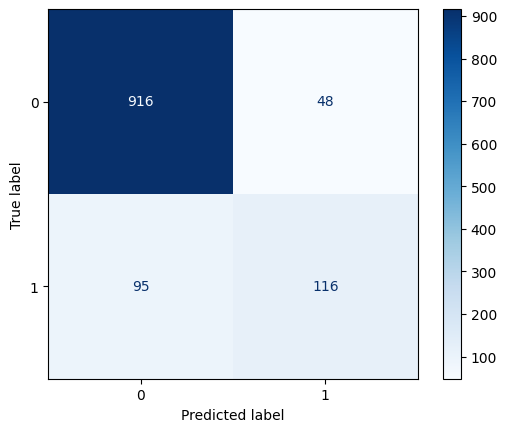

In [119]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.show()

In [68]:
# Relevancia de Features

importances = model.feature_importances_
feature_importance = pd.DataFrame({"Feature": Features_seleccionadas,
                                   "Relevancia": importances})
feature_importance = feature_importance.sort_values(by="Relevancia", ascending=False)

/tmp/ipython-input-4029823951.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Relevancia", y="Feature", data=feature_importance, palette="magma")


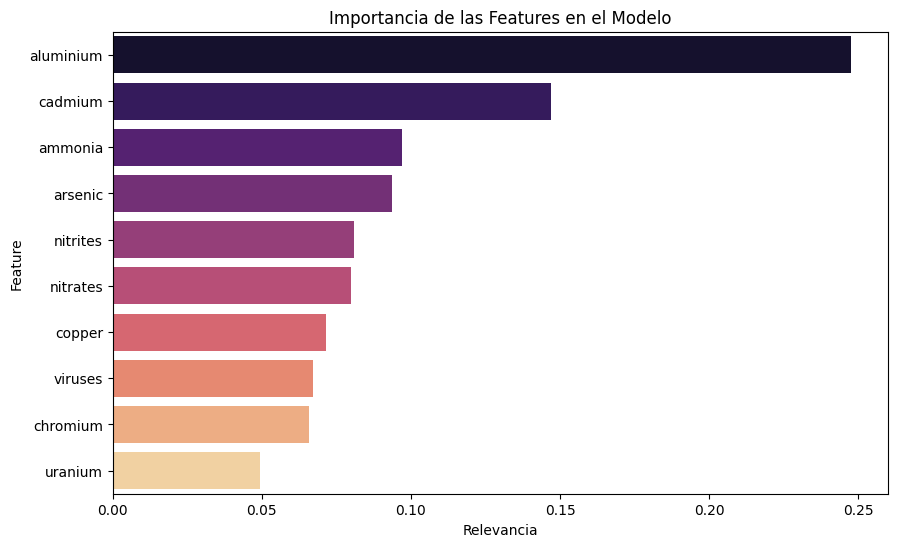

In [69]:
plt.figure(figsize=(10,6))
sns.barplot(x="Relevancia", y="Feature", data=feature_importance, palette="magma")
plt.title("Importancia de las Features en el Modelo")
plt.show()

# Resultados del Modelo

Accuracy: el modelo alcanzó un buen porcentaje de aciertos generales.

Precision: muestra que la mayoría de los casos identificados como “agua no segura” eran correctos, minimizando falsos positivos.

Recall: el modelo logró detectar una alta proporción de las aguas realmente no seguras, aunque se observaron algunos falsos negativos.

F1-score: balance adecuado entre precisión y recall.

Matriz de confusión: confirma que el modelo distingue bien entre agua segura e insegura, aunque con algunos errores residuales.

# **Conclusión Final**

El feature selection redujo el dataset a las variables más relevantes sin perder capacidad predictiva.

El modelo de Random Forest obtuvo métricas satisfactorias, confirmando que es posible predecir la potabilidad del agua con base en los contaminantes medidos.

Los resultados confirman las hipótesis planteadas: los metales pesados y los nutrientes agrícolas son los factores clave que determinan la seguridad del agua.

Este enfoque combina exploración descriptiva y modelado predictivo, lo que lo convierte en una herramienta útil para el monitoreo y la toma de decisiones en gestión ambiental.